# BigMart Project: Data Exploration and Planning Questions

## Carry out and present the results of your previously planned data exploration.

In [184]:
library(tidyverse)
library(skimr)
library(RColorBrewer)

In [185]:
# Loading the data
df_url = "data/BigMart data.csv"


df = read_csv(df_url)


# Preview the data
head(df)

Rows: 8523 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Ou...
dbl (5): Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


#### Step 1: Checking for duplicates

In [186]:
# Previewing the unique records in the dataset
glimpse(distinct(df))

Rows: 8,523
Columns: 12
$ Item_Identifier           <chr> "FDA15", "DRC01", "FDN15", "FDX07", "NCD19",…
$ Item_Weight               <dbl> 9.300, 5.920, 17.500, 19.200, 8.930, 10.395,…
$ Item_Fat_Content          <chr> "Low Fat", "Regular", "Low Fat", "Regular", …
$ Item_Visibility           <dbl> 0.016047301, 0.019278216, 0.016760075, 0.000…
$ Item_Type                 <chr> "Dairy", "Soft Drinks", "Meat", "Fruits and …
$ Item_MRP                  <dbl> 249.8092, 48.2692, 141.6180, 182.0950, 53.86…
$ Outlet_Identifier         <chr> "OUT049", "OUT018", "OUT049", "OUT010", "OUT…
$ Outlet_Establishment_Year <dbl> 1999, 2009, 1999, 1998, 1987, 2009, 1987, 19…
$ Outlet_Size               <chr> "Medium", "Medium", "Medium", NA, "High", "M…
$ Outlet_Location_Type      <chr> "Tier 1", "Tier 3", "Tier 1", "Tier 3", "Tie…
$ Outlet_Type               <chr> "Supermarket Type1", "Supermarket Type2", "S…
$ Item_Outlet_Sales         <dbl> 3735.1380, 443.4228, 2097.2700, 732.3800, 99…


> From the above there are no duplicate records in the dataset. The dataset contains 8523 unique records.

### Checking for Missing Values

In [187]:
# How many records are missing?
colSums(is.na(df))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                      1463                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                      2410 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                        0                         0                         0

> From the above there are **1463** values missing from the **Item_Weight** field and **2410** values missing from the **Outlet_Size** field

### Univariate Analysis of Columns

> The dataset consists of **5** numeric variables and **7** categorical variables.

In [188]:
# Previewing Item Weight
df |>
    # Select the Item_Weight Col
    select(Item_Weight) |>
    summarise(avg=mean(Item_Weight, na.rm = TRUE), 
              std_dev=sd(Item_Weight, na.rm=TRUE), 
              median=median(Item_Weight, na.rm=TRUE),
              qtile_25 = quantile(Item_Weight, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_Weight, probs=0.75, na.rm=TRUE),
              iqr = IQR(Item_Weight, na.rm=TRUE),
              min = min(Item_Weight, na.rm=TRUE),
              max = max(Item_Weight, na.rm=TRUE),
              non_missing_rows = NROW(Item_Weight[!is.na(Item_Weight)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
12.85765,4.643456,12.6,8.77375,16.85,8.07625,4.555,21.35,7060


Warning message:
"Removed 1463 rows containing non-finite values (`stat_bin()`)."


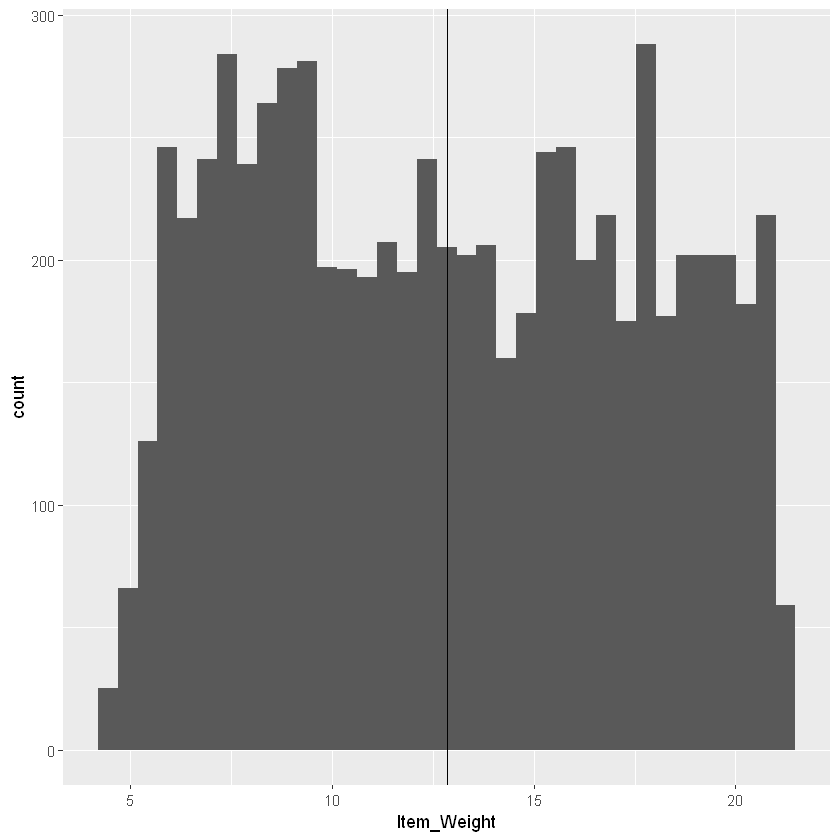

In [189]:
# Previewing Item Weight
df |>
    # Select the Item_Weight Col
    select(Item_Weight) |>
ggplot( 
    aes(x = Item_Weight)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_Weight, na.rm = TRUE))

> This histogram shows a fairly uniformly distributed Item-Weight.

In [190]:
# Previewing Item_Visibility
df |>
    # Select the Item_Weight Col
    select(Item_Visibility) |>
    summarise(avg=mean(Item_Visibility, na.rm = TRUE), 
              std_dev=sd(Item_Visibility, na.rm=TRUE), 
              median=median(Item_Visibility, na.rm=TRUE),
              qtile_25 = quantile(Item_Visibility, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_Visibility, probs=0.75, na.rm=TRUE),
              iqr = IQR(Item_Visibility, na.rm=TRUE),
              min = min(Item_Visibility, na.rm=TRUE),
              max = max(Item_Visibility, na.rm=TRUE),
              non_missing_rows = NROW(Item_Visibility[!is.na(Item_Visibility)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.06613203,0.05159782,0.05393093,0.02698948,0.09458529,0.06759582,0,0.3283909,8523


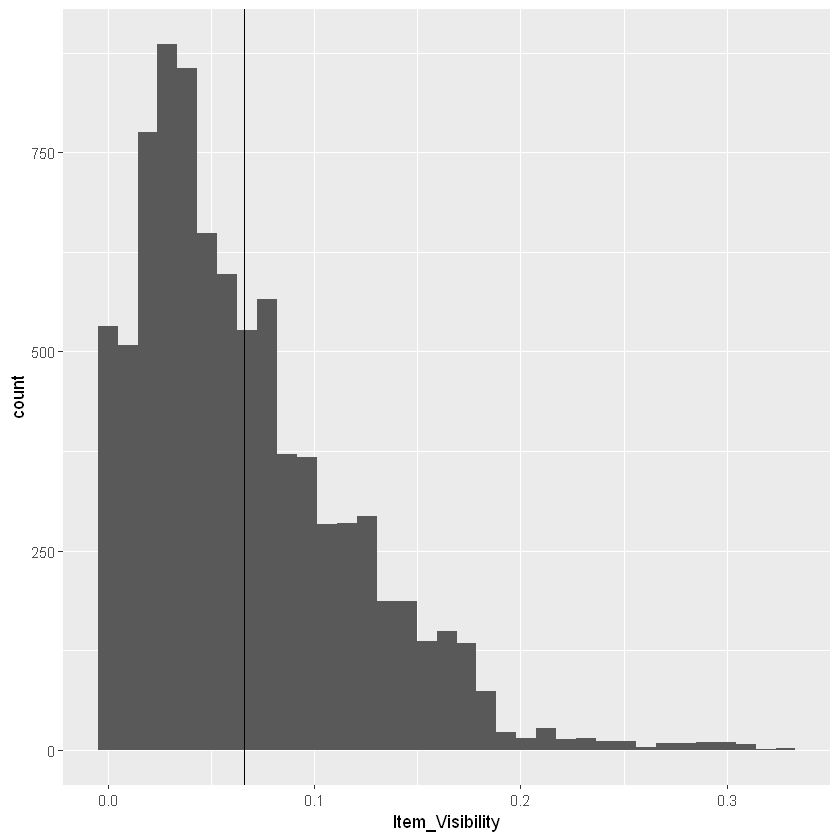

In [191]:
# Previewing Item_Visibility
df |>
    # Select the Item_Visibility Col
    select(Item_Visibility) |>
ggplot( 
    aes(x = Item_Visibility)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_Visibility, na.rm = TRUE))

> The histogram shows a positively skewed distribution where most records are between 0.0 and 0.2.

In [192]:
# Previewing Item_MRP
df |>
    # Select the Item_Weight Col
    select(Item_MRP) |>
    summarise(avg=mean(Item_MRP, na.rm = TRUE), 
              std_dev=sd(Item_MRP, na.rm=TRUE), 
              median=median(Item_MRP, na.rm=TRUE),
              qtile_25 = quantile(Item_MRP, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_MRP, probs=0.75, na.rm=TRUE),              
              iqr = IQR(Item_MRP, na.rm=TRUE),
              min = min(Item_MRP, na.rm=TRUE),
              max = max(Item_MRP, na.rm=TRUE),
              non_missing_rows = NROW(Item_MRP[!is.na(Item_MRP)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
140.9928,62.27507,143.0128,93.8265,185.6437,91.8172,31.29,266.8884,8523


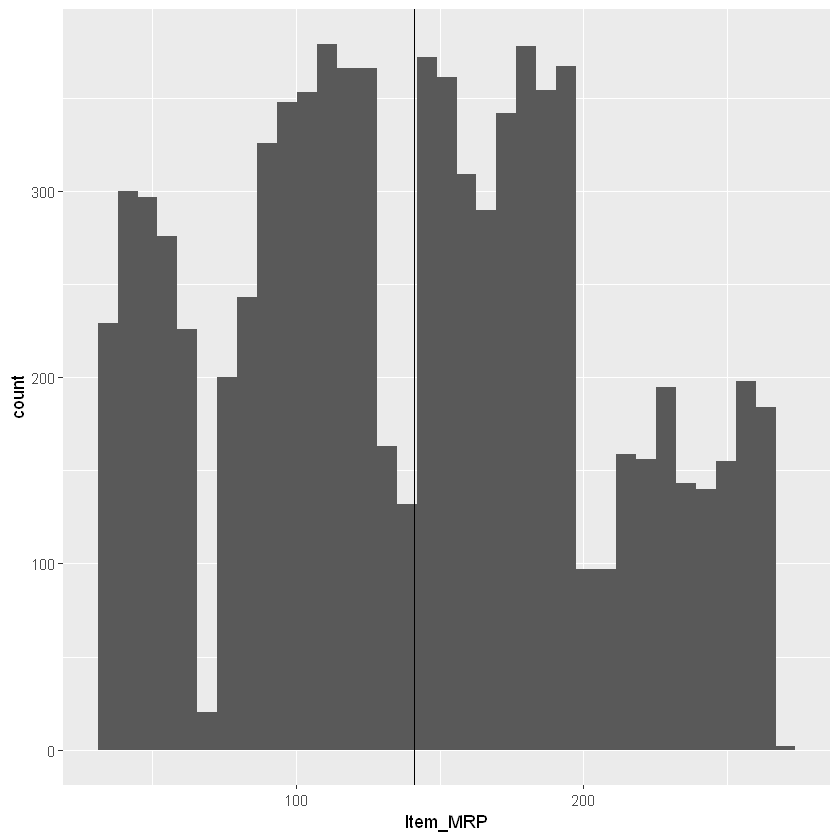

In [193]:
# Previewing Item_MRP
df |>
    # Select the Item_MRP Col
    select(Item_MRP) |>
ggplot( 
    aes(x = Item_MRP)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_MRP, na.rm = TRUE))

> Above distribution is bi-modal with most MRP occuring arround 100 and 175. 

In [194]:
# Previewing Item_Outlet_Sales
df |>
    # Select the Item_Weight Col
    select(Item_Outlet_Sales) |>
    summarise(avg=mean(Item_Outlet_Sales, na.rm = TRUE), 
              std_dev=sd(Item_Outlet_Sales, na.rm=TRUE), 
              median=median(Item_Outlet_Sales, na.rm=TRUE),
              qtile_25 = quantile(Item_Outlet_Sales, probs=0.25, na.rm=TRUE),
              qtile_75 = quantile(Item_Outlet_Sales, probs=0.75, na.rm=TRUE),
              iqr = IQR(Item_Outlet_Sales, na.rm=TRUE),
              min = min(Item_Outlet_Sales, na.rm=TRUE),
              max = max(Item_Outlet_Sales, na.rm=TRUE),
              non_missing_rows = NROW(Item_Outlet_Sales[!is.na(Item_Outlet_Sales)])
             )

avg,std_dev,median,qtile_25,qtile_75,iqr,min,max,non_missing_rows
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2181.289,1706.5,1794.331,834.2474,3101.296,2267.049,33.29,13086.96,8523


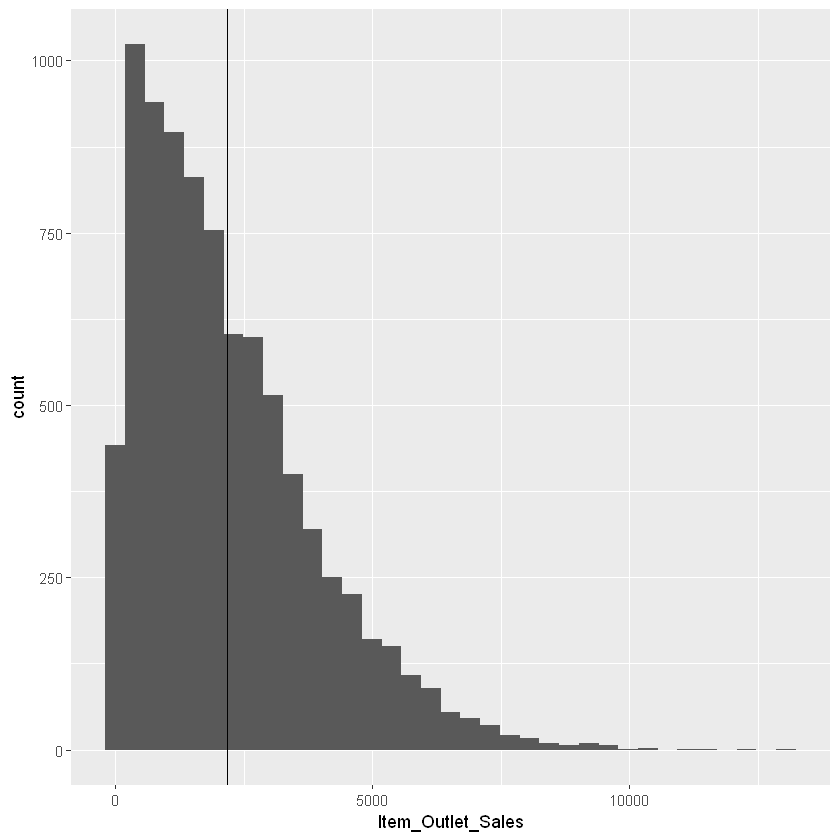

In [195]:
# Previewing Item_Outlet_Sales
df |>
    # Select the Item_Outlet_Sales Col
    select(Item_Outlet_Sales) |>
ggplot( 
    aes(x = Item_Outlet_Sales)) +
geom_histogram(bins = 35) +
geom_vline(xintercept=mean(df$Item_Outlet_Sales, na.rm = TRUE))

> The above histogram shows that majority of the values lie between 0-7500.

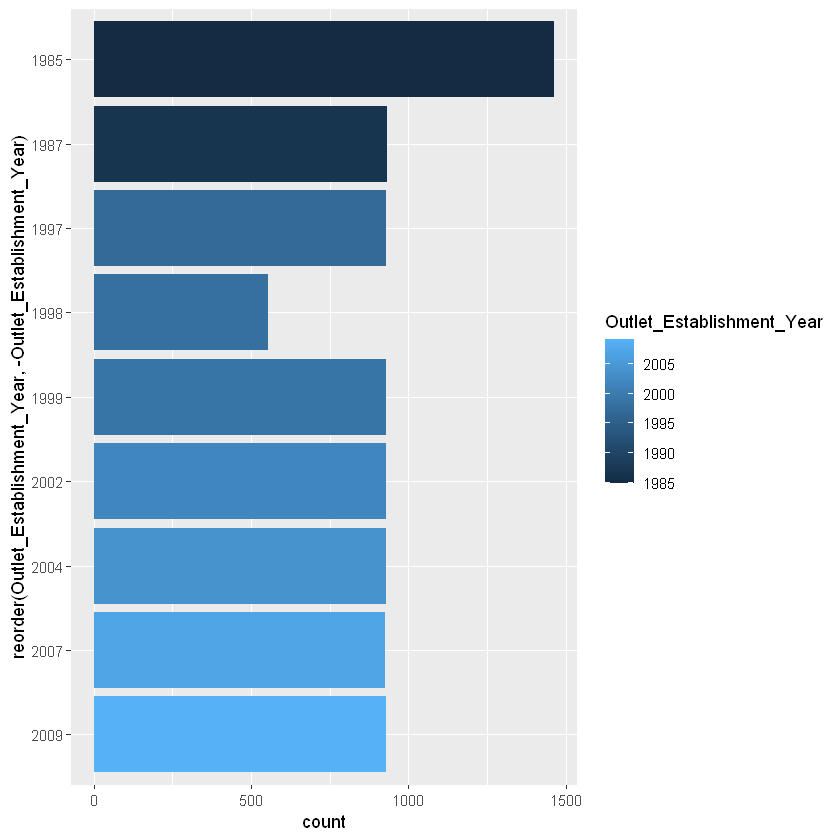

In [196]:
# Analyzing the Outlet_Establishment_Year
df |>
    select(Outlet_Establishment_Year) |>
    summarise(.by=Outlet_Establishment_Year, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Establishment_Year, -Outlet_Establishment_Year), y=count, fill=Outlet_Establishment_Year)
) +
geom_col() + 
coord_flip()

> The chart above shows that most outlets were established in 1985. Less outlets were established in 1998 but since then a study number of outlets has been established till 2009.

### Analyzing the Categorical Variables

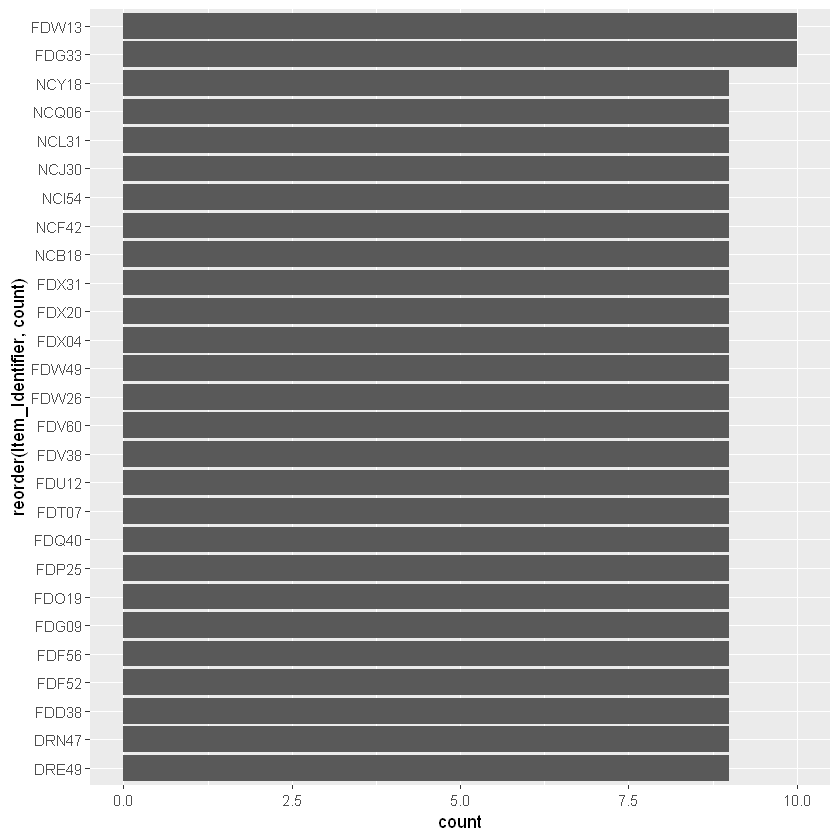

In [197]:
# Analyzing the Item_Identifier
df |>
    select(Item_Identifier) |>
    summarise(.by=Item_Identifier, count=n()) |>
    # Select the top 10
    slice_max(count, n=10) |>
ggplot(
    aes(x=reorder(Item_Identifier, count), y=count)
) +
geom_col() + 
coord_flip()

> From the above, there aren't enough records for each group to use this filed in my predictive model. This is because each subgroup has at most 10 records. Some prediction algorithms run into errors when a subgroup has a low number of observations. I will test this is my predictive model and provide feedback.

In [117]:
# Analyzing the Item_Fat_Content
df |>
    select(Item_Fat_Content) |>
    summarise(.by=Item_Fat_Content, count=n()) #|>

Item_Fat_Content,count
<chr>,<int>
Low Fat,5089
Regular,2889
low fat,112
LF,316
reg,117


> From the above, the **Low Fat** records are represented differently, and this has to be cleaned. **Low Fat** is represented as **low fat** and **LF**. And also, replace **reg** with **Regular**

In [198]:
# Fixing the Item_Fat_Content
df <- df |>
    # Fix the Item_Fat_Content Col
    mutate(Item_Fat_Content = case_when(
                                      # low fat
                                      Item_Fat_Content == "low fat" ~ "Low Fat",
                                      # LF
                                      Item_Fat_Content == "LF" ~ "Low Fat",
                                      # reg
                                      Item_Fat_Content == "reg"  ~ "Regular",
                                      # Else
                                      TRUE ~ Item_Fat_Content
    ))

df |>
    select(Item_Fat_Content) |>
    summarise(.by=Item_Fat_Content, count=n())

Item_Fat_Content,count
<chr>,<int>
Low Fat,5517
Regular,3006


> With the new errors fixed, now we have 5517 records for Low Fat and 3006 records for Regular.

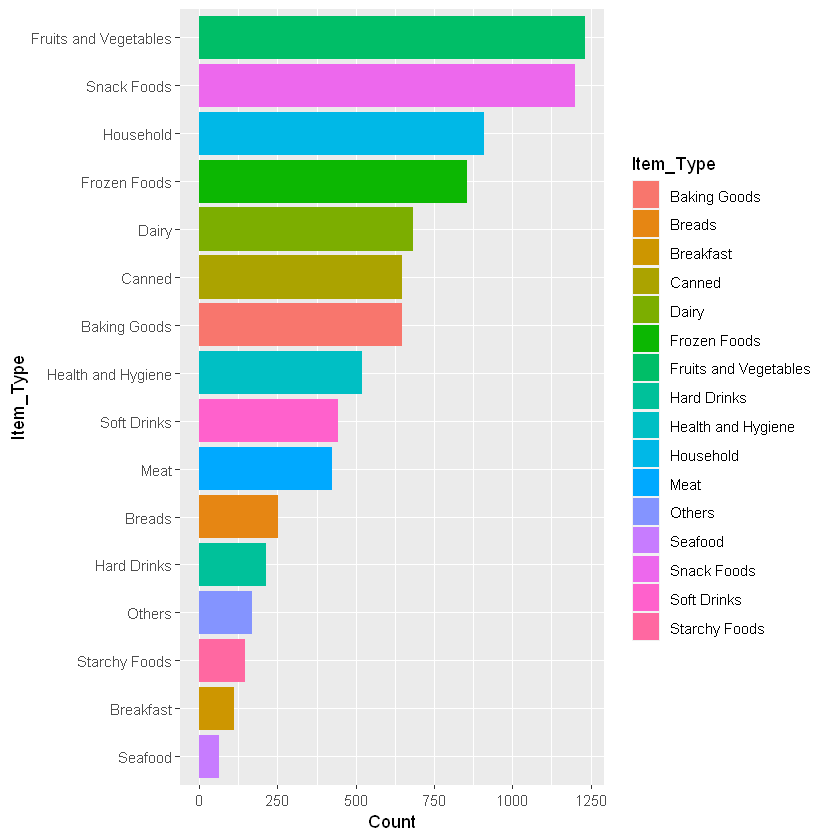

In [218]:
# Analyzing the Item_Type
df |>
    select(Item_Type) |>
    summarise(.by=Item_Type, count=n()) |>
ggplot(
    aes(x=reorder(Item_Type, count), y=count, fill=Item_Type)
) +
geom_col() + 
coord_flip() + 
ylab("Count") +
xlab("Item_Type")

> From the data, most sales happen with the Fruits and Vegetables items.

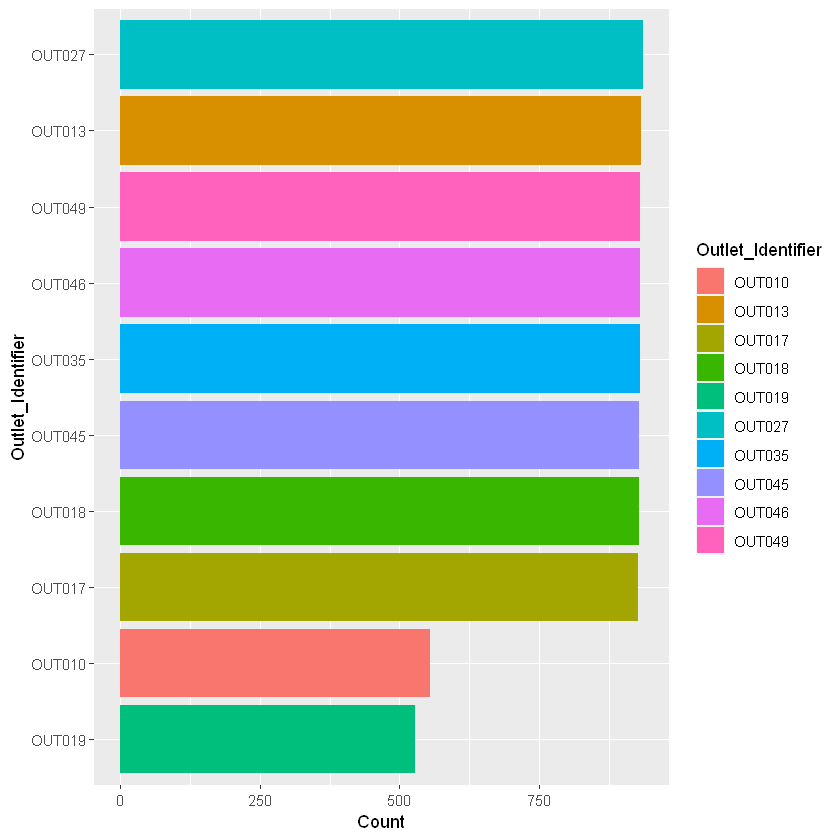

In [222]:
# Analyzing the Outlet_Identifier
df |>
    select(Outlet_Identifier) |>
    summarise(.by=Outlet_Identifier, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Identifier, count), y=count, fill=Outlet_Identifier)
) +
geom_col() + 
coord_flip() + 
xlab("Outlet_Identifier") +
ylab("Count")

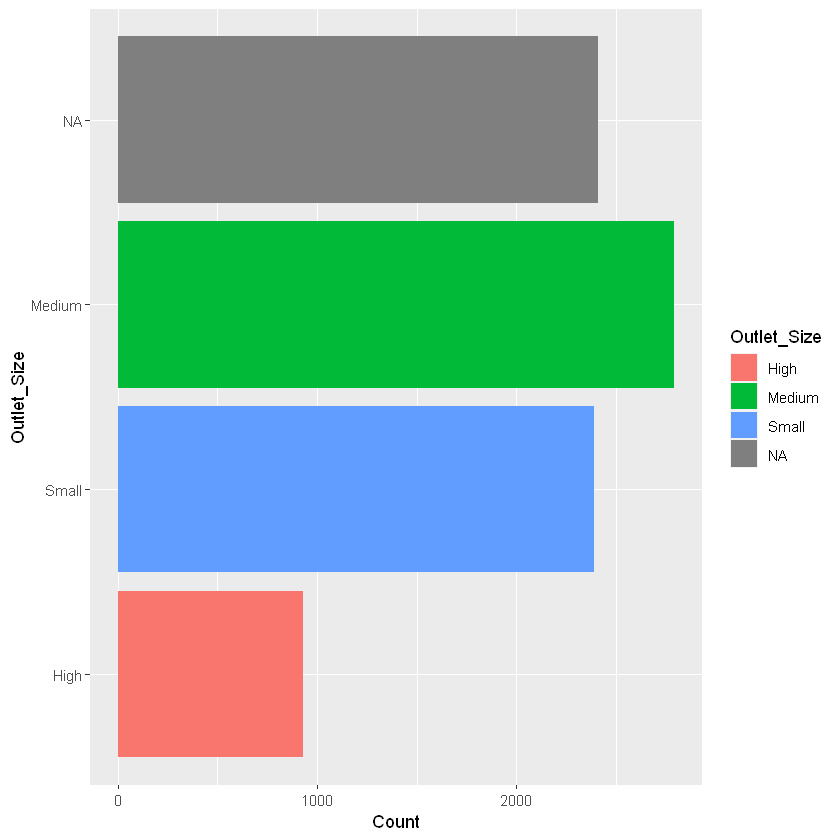

In [223]:
# Analyzing the Outlet_Size
df |>
    select(Outlet_Size) |>
    summarise(.by=Outlet_Size, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Size, count), y=count, fill=Outlet_Size)
) +
geom_col() + 
coord_flip() + 
xlab("Outlet_Size") +
ylab("Count")

> From the above, most outlets are medium in size. I will have to check if the missing values here are missing completely at random or are missing at random.

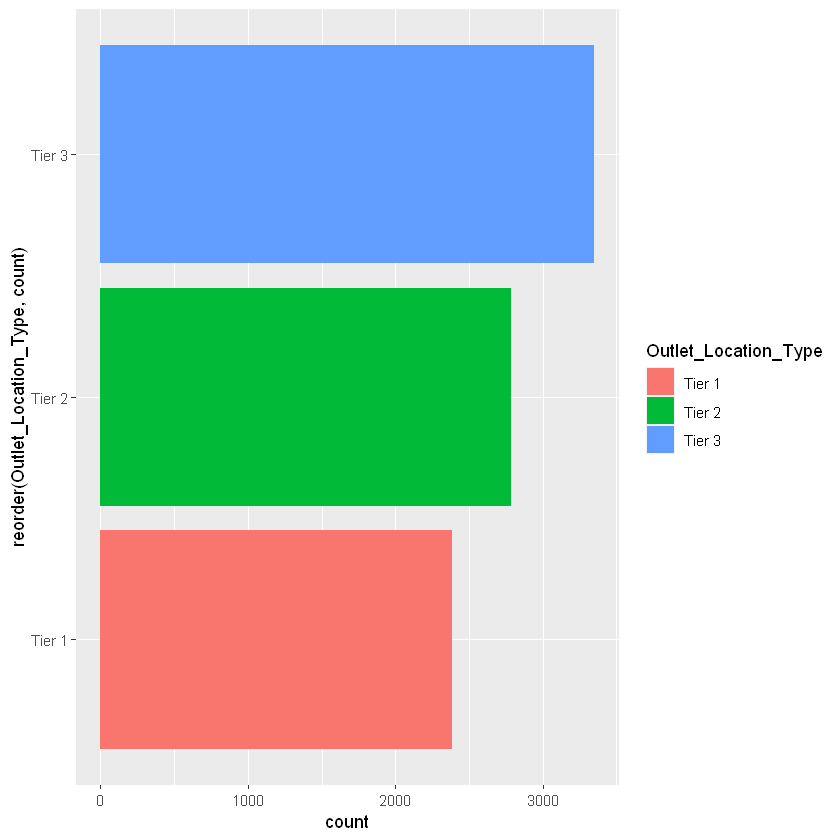

In [202]:
# Analyzing the Outlet_Location_Type
df |>
    select(Outlet_Location_Type) |>
    summarise(.by=Outlet_Location_Type, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Location_Type, count), y=count, fill=Outlet_Location_Type)
) +
geom_col() + 
coord_flip()

> The location type is dominated by Tier 3.

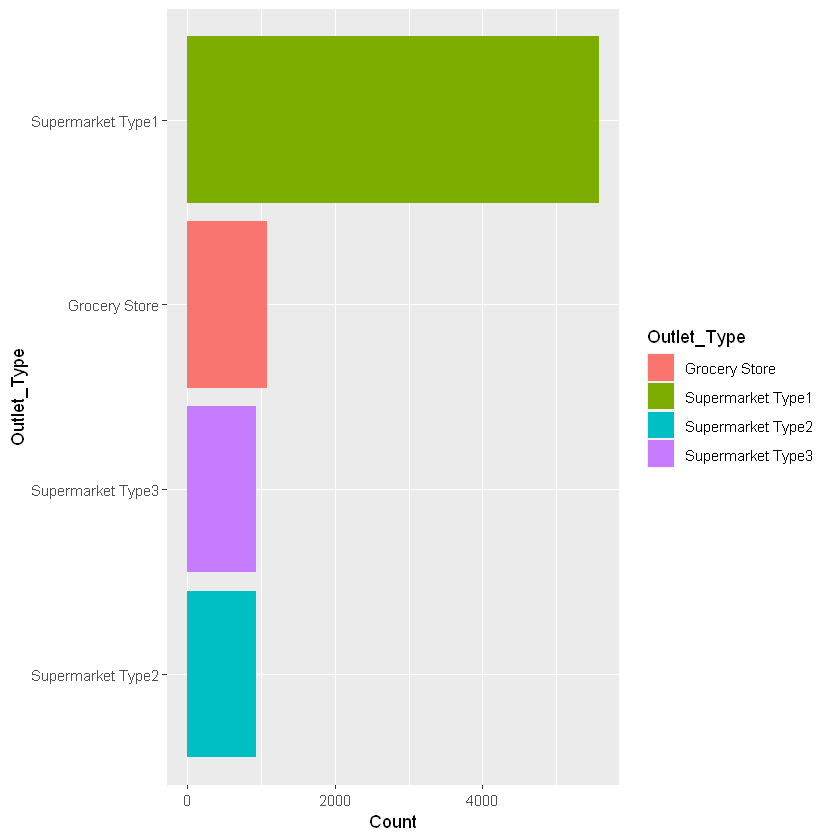

In [224]:
# Analyzing the Outlet_Type
df |>
    select(Outlet_Type) |>
    summarise(.by=Outlet_Type, count=n()) |>
ggplot(
    aes(x=reorder(Outlet_Type, count), y=count, fill=Outlet_Type)
) +
geom_col() + 
coord_flip()  + 
xlab("Outlet_Type") +
ylab("Count")

> In this dataset, outlet type is dominated by supermarkets Type 1.

### Bivariate Analysis

In [225]:
library(GGally)

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1463 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1463 rows containing missing values"
Warning message:
"Removed 1463 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1463 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1463 rows containing non-finite values (`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1463 rows containing missing values"
Warning message:
"Removed 1463 rows containing missing values (`geom_point()`)."


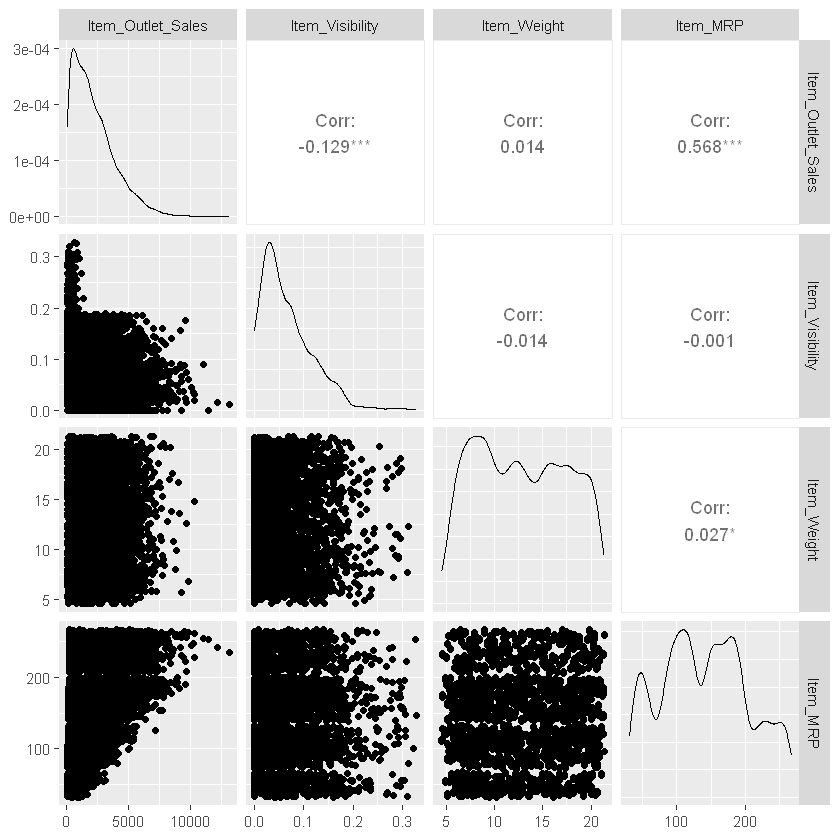

In [226]:
ggpairs(
    df[, c("Item_Outlet_Sales", "Item_Visibility", "Item_Weight", "Item_MRP")],
)

> No clear linear relationships exists b/n **Item Outlet sales** and **Item_Visibility**, **Item_Weight**. A clearly linear relationship exists between **Item_Sales_Outlet** and **Item_MRP**.

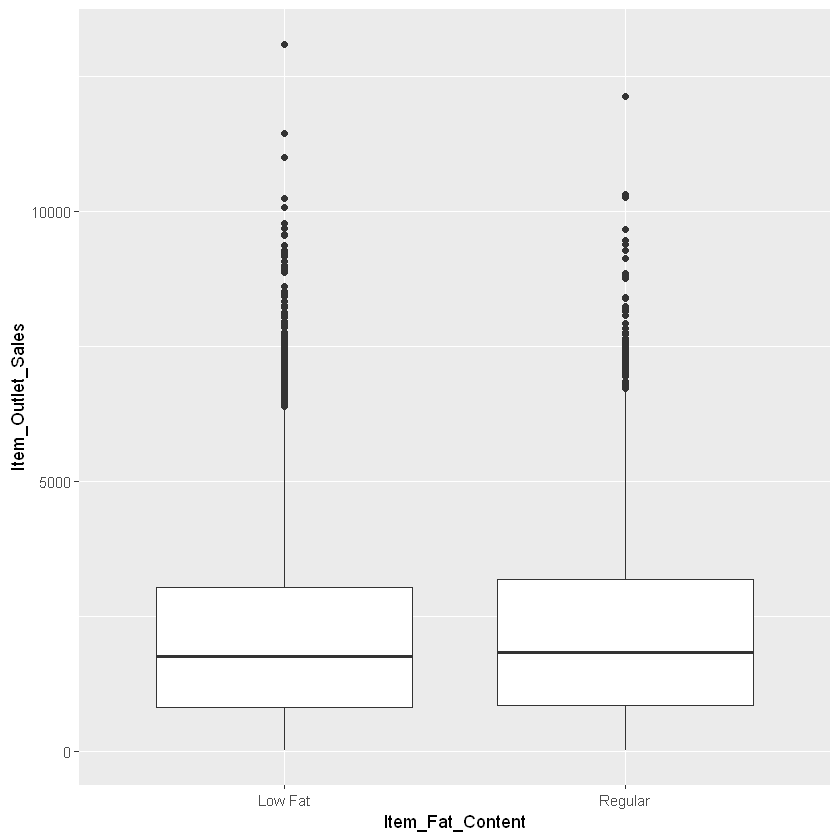

In [233]:
# Determining the relationship b/n Item_Outlet_Sales and Item_Fat_Content

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x=reorder(Item_Fat_Content, Item_Outlet_Sales))
) +
geom_boxplot()  + 
xlab("Item_Fat_Content") +
ylab("Item_Outlet_Sales")

> From the above it looks like the regular item fat content leads to more sales

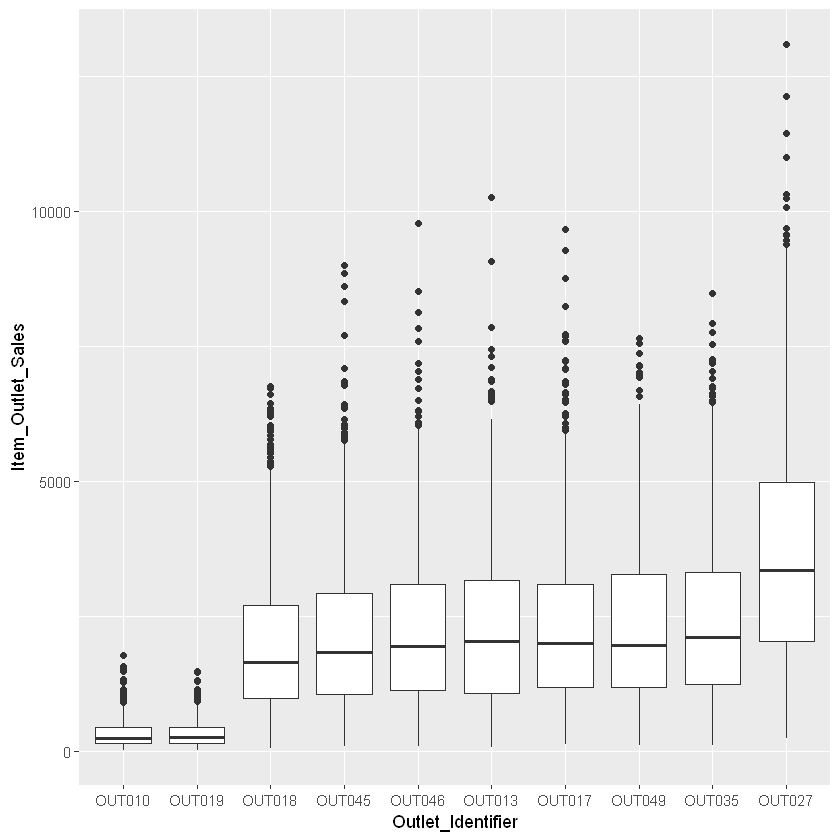

In [235]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Identifier

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x= reorder(Outlet_Identifier, Item_Outlet_Sales))
) +
geom_boxplot() + 
xlab("Outlet_Identifier") +
ylab("Item_Outlet_Sales")

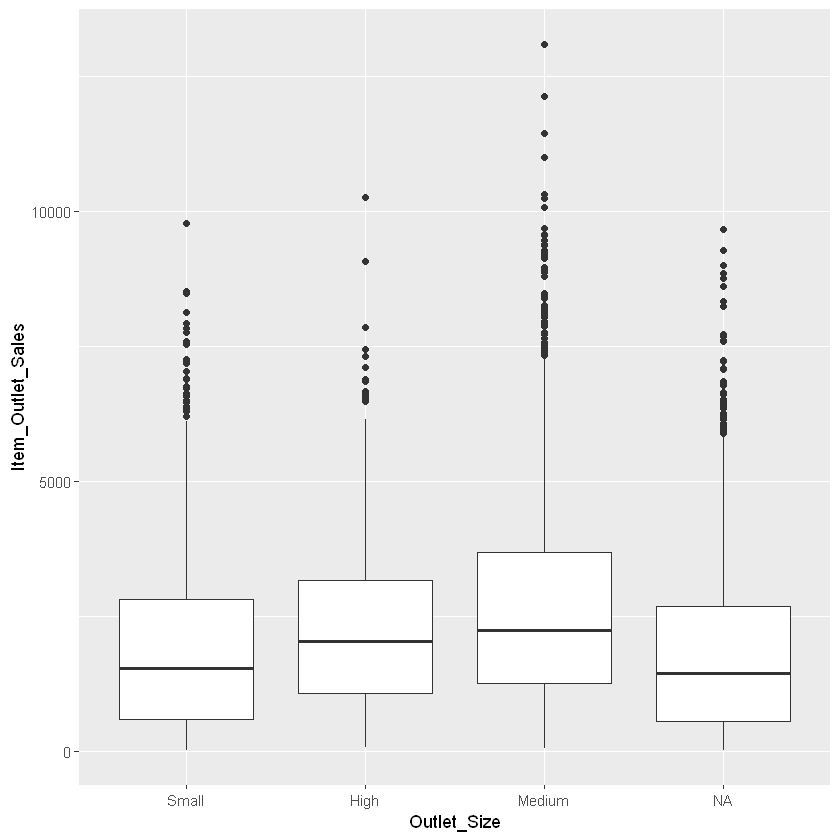

In [236]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Size

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x= reorder(Outlet_Size, Item_Outlet_Sales))
) +
geom_boxplot() + 
xlab("Outlet_Size") +
ylab("Item_Outlet_Sales")

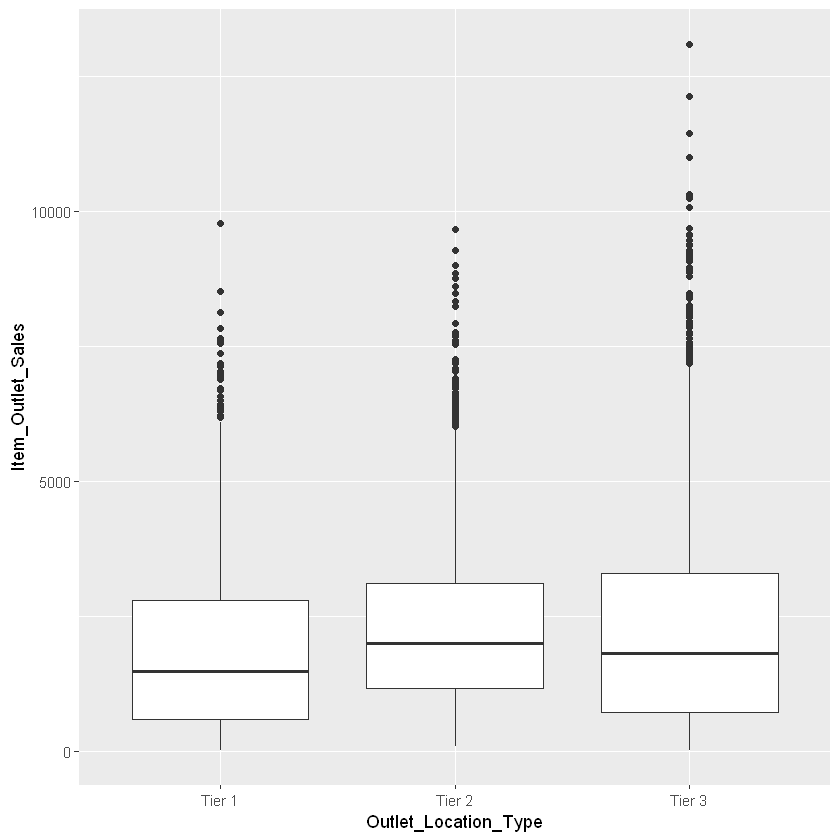

In [230]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Location_Type

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x=Outlet_Location_Type)
) +
geom_boxplot()

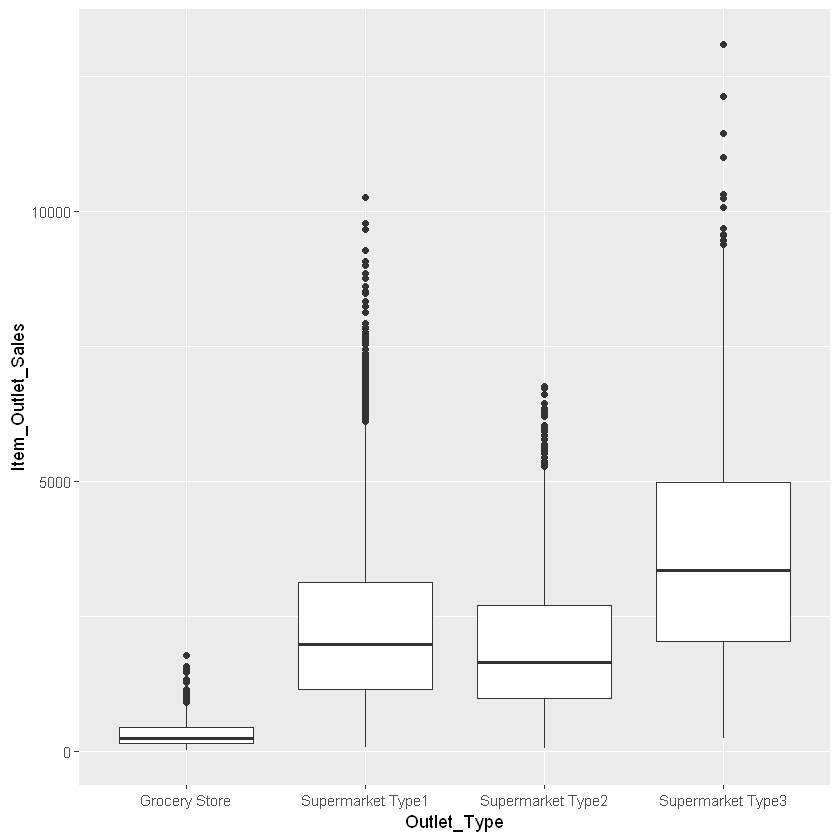

In [231]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Type

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x=Outlet_Type)
) +
geom_boxplot()

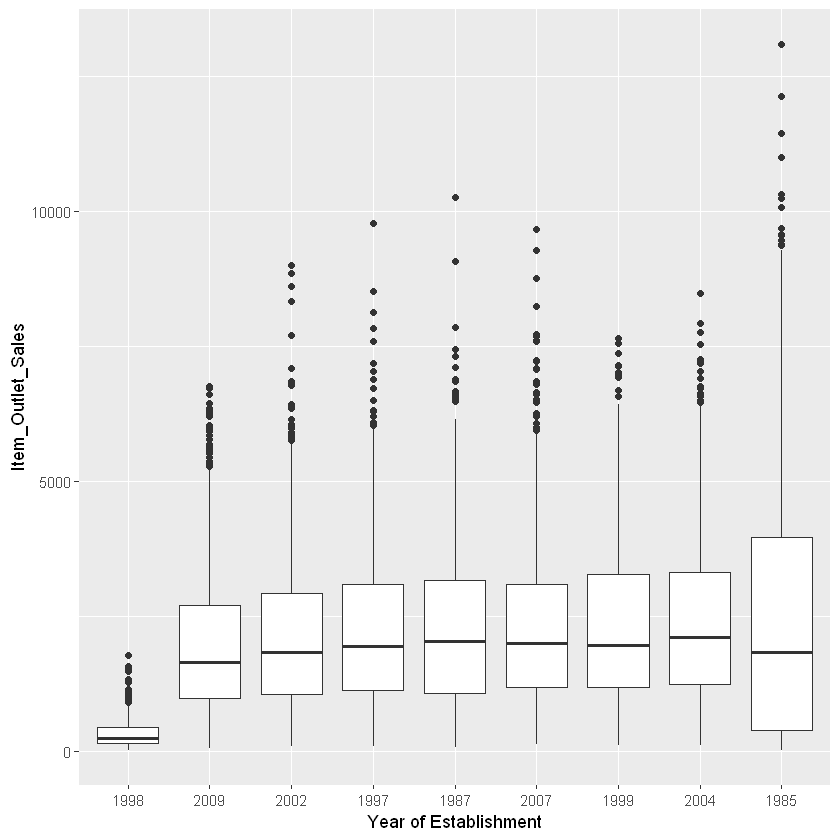

In [238]:
# Determining the relationship b/n Item_Outlet_Sales and Outlet_Establishment_Year

df |>
ggplot(
    aes(y=Item_Outlet_Sales, x= reorder(as.factor(Outlet_Establishment_Year), Item_Outlet_Sales))
) +
geom_boxplot() +
xlab("Year of Establishment")

## Building the Product

### What will the final product be?

The product will be a **report** that details the **influence** of *item characteristics* and *store profile* on item_sales.

In addition, the product will contain a *user-friendly application* that will provide business teams the ability to **predict/forecast** the sales of an item based on the item characteristics and store profile.

### Which Statistical Methods will be used and purpose of each?

I will be using the following statistical methods:

- **Descriptive Statistics**: This will reveal the properties of the given data.
- **Univariate and Bivariate analysis**: This will enable me to understand the distribution of the data and the relationship between the predictors and the response variable (item_sales_outlet).
- **Correlation Analysis**: This gives a level of association between all variables.
- **Modelling**: Here, I will build predictive models that best fit the data and evaluate each model using the **adjusted R-squared** metric.

### Which software?

For this analysis, I will be using R.

### Will these be adequate?

This analysis will be adequate to achieve the obectives of this analysis i.e.

1. Produce a report to guide strategic decision making.
2. Produce a user friendly application that forecasting tool to guide **tactical** and **operational** decisions 

### How will the analysis be validated?

The analysis will be validated in two ways:

1. We will document domain knowledge within the organization i.e. interview various tores to understand their beliefs of how **item characteristics** and **store profile** affects sales. After this we will test whether our model validates or contradicts their beliefs.
2. We will request for new data to evaluate/validate our model and check whether our model test performance (measured by RMSE/MAE or Adjusted-R-squared), is atleast better than our training performance (from our analysis). 

#### Does the product need to be tested?

The product will need to be tested to ensure high performance. 

## Delivering the Product


### Who is the audience?

The audience of this report are in 2 broad folds:
1. **Upper level management**: A comprehensive report detailing the influences/factors that affect item_outlet_sales will be submitted to this audience. This report will significantly guide strategic decision-making.
2. **Supply Chain and Sales teams**: A prediction/forecasting tool (or application) will be delivered to this audience to enable planning and sales forecast.

### How will the product be delivered?

The product will be produced via the ff approach:

1. **Exploring the data**: This will tie understanding the business to how the data reflects the business. This will include missing data analysis, correlation analysis, scatterplots and other approaches to understand the data.
2. **Plan the analysis**: Based on the results of the data exploration, I will plan how to deal with missing data, will predictors need to be transformed and prepare the data to be modeled.
3. **Modelling and Evaluation**: Build the predctive models and evaluate the performance of these models.
4. **Deployment**: Producing the report and building the application.

### How will the product be used?

The product will be used in the following ways:

1. **Report**: This will be used to enable strategic decision-making. For instance, this will inform decisions on what outlet locations and types influence item sales.
2. **Application**: This tool will be used by mid-level staff for tactical and operational decision making. For example to forecast sales for a given product in a given store.

### How much detail to include?

1. **Report**: This should be high-level information and not include so much detail on modelling approaches and others.
2. **Application**: This should contain enough detail for the application to be used to predict/forecast sales.